<a href="https://colab.research.google.com/github/GarimaSingh0109/GPA_Prediction/blob/main/gpa_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/sample_gpa_data.csv')

Index(['Age', 'Gender', 'Study_Hours', 'Sleep_Hours', 'Attendance_Percent',
       'Past_GPA', 'LMS_Activity_Score', 'GPA'],
      dtype='object')


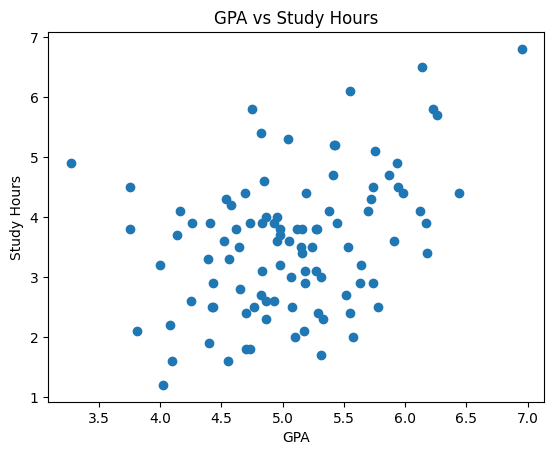

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/content/sample_gpa_data.csv')

# Check the actual column names in your DataFrame
print(df.columns)

# Assuming the correct column name is 'Study_Hours', adjust the code accordingly:
studied_hours = df['Study_Hours']  # Replace 'Study_Hours' with the actual column name if different
grade = df['GPA']  # 'GPA' likely exists as a column name but double-check your DataFrame

plt.scatter(grade, studied_hours)
plt.xlabel("GPA")  # Adding label to x-axis
plt.ylabel("Study Hours")  # Adding label to y-axis
plt.title("GPA vs Study Hours")  # Adding title to plot
plt.show()

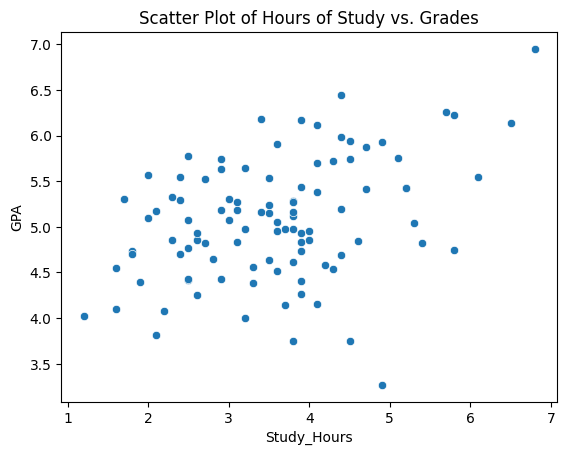

In [ ]:
import seaborn as sns
sns.scatterplot(x='Study_Hours', y='GPA', data=df)
plt.title('Scatter Plot of Hours of Study vs. Grades')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Study_Hours']]
y = df['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.46975418874106956


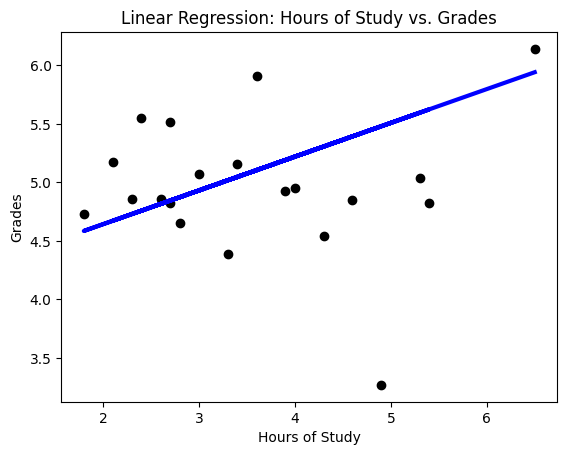

In [ ]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: Hours of Study vs. Grades')
plt.xlabel('Hours of Study')
plt.ylabel('Grades')
plt.show()

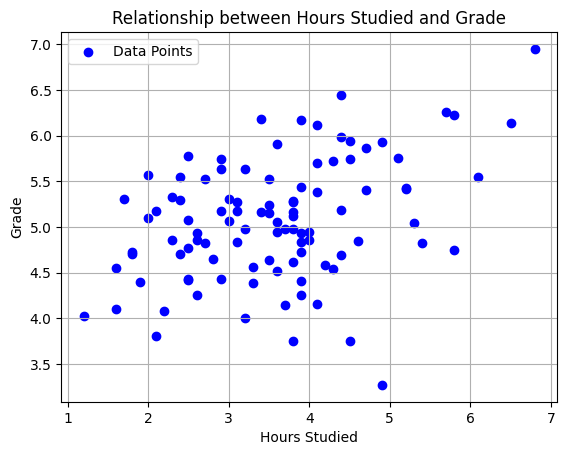

In [ ]:
import matplotlib.pyplot as plt

hours_studied = df['Study_Hours']
grades = df['GPA']

plt.scatter(hours_studied, grades, color='blue', label='Data Points')
plt.title('Relationship between Hours Studied and Grade')
plt.xlabel('Hours Studied')
plt.ylabel('Grade')
plt.legend()
plt.grid(True)
plt.show()

Slope (m): 0.22252673533162334
Intercept (b): 4.273802081601436


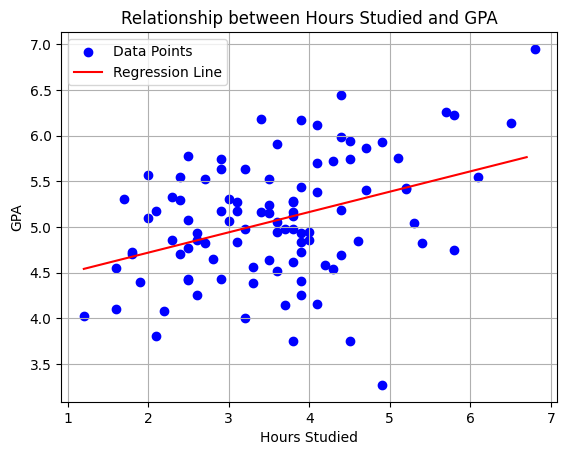

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
hours_studied = df['Study_Hours'].values.reshape(-1, 1)
grades = df['GPA']

model = LinearRegression()

model.fit(hours_studied, grades)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

hours_range = np.arange(df['Study_Hours'].min(), df['Study_Hours'].max(), 0.1).reshape(-1, 1)
predicted_grades = model.predict(hours_range)

plt.scatter(df['Study_Hours'], grades, color='blue', label='Data Points')
plt.plot(hours_range, predicted_grades, color='red', label='Regression Line')
plt.title('Relationship between Hours Studied and GPA')
plt.xlabel('Hours Studied')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

Slope (m): 0.22252673533162334
Intercept (b): 4.273802081601436


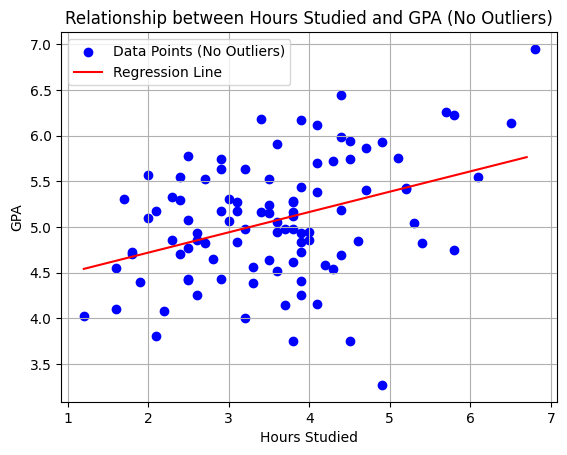

In [ ]:
from scipy.stats import zscore
hours_studied = df['Study_Hours'].values.reshape(-1, 1)
grades = df['GPA']

z_scores = zscore(df[['Study_Hours', 'GPA']])

outlier_threshold = 3

outlier_indices = np.where(np.abs(z_scores) > outlier_threshold)[0]

cleaned_hours_studied = np.delete(hours_studied, outlier_indices, axis=0)
cleaned_grades = np.delete(grades, outlier_indices)

model = LinearRegression()
model.fit(cleaned_hours_studied, cleaned_grades)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Slope (m): {slope}")
print(f"Intercept (b): {intercept}")

hours_range = np.arange(df['Study_Hours'].min(), df['Study_Hours'].max(), 0.1).reshape(-1, 1)
predicted_grades = model.predict(hours_range)

plt.scatter(cleaned_hours_studied, cleaned_grades, color='blue', label='Data Points (No Outliers)')
plt.plot(hours_range, predicted_grades, color='red', label='Regression Line')
plt.title('Relationship between Hours Studied and GPA (No Outliers)')
plt.xlabel('Hours Studied')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

Exploratory Data Analysis (EDA)

In [ ]:
print(df.isnull().sum())

Age                   0
Gender                0
Study_Hours           0
Sleep_Hours           0
Attendance_Percent    0
Past_GPA              0
LMS_Activity_Score    0
GPA                   0
dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Study Hours')

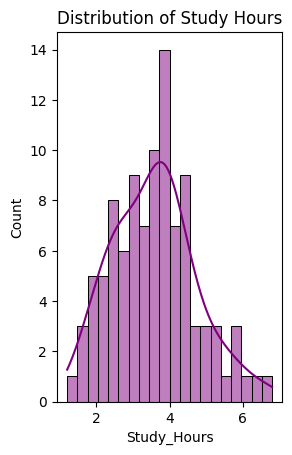

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(df['Study_Hours'], bins=20, kde=True, color='purple')
plt.title('Distribution of Study Hours')

Text(0.5, 1.0, 'Distribution of GPA')

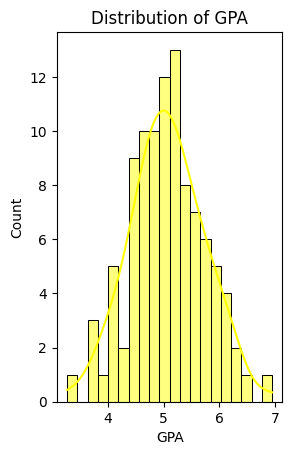

In [ ]:
plt.subplot(1, 2, 2)
sns.histplot(df['GPA'], bins=20, kde=True, color='yellow')
plt.title('Distribution of GPA')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

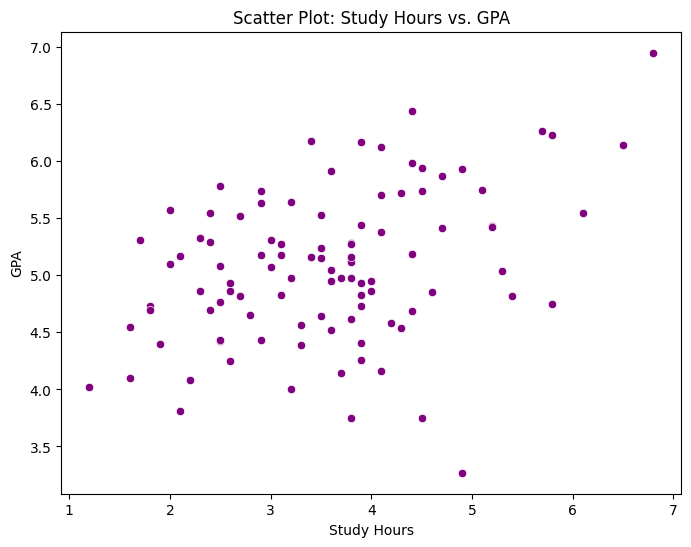

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Study_Hours', y='GPA', data=df, color='purple')
plt.title('Scatter Plot: Study Hours vs. GPA')
plt.xlabel('Study Hours')
plt.ylabel('GPA')
plt.show()

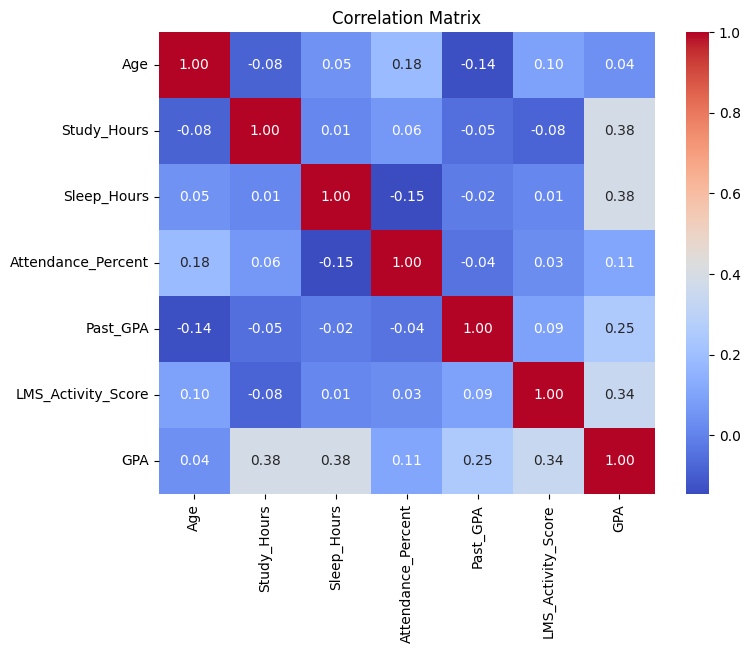

In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()